In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# !pip install numpy==1.15.1
# 1.16.2

In [3]:
import sys
sys.path.append("/home/ubuntu/fastai/old")

In [4]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
torch.cuda.set_device(0)

import pdb
import warnings
warnings.filterwarnings('ignore')

In [5]:
PATH = Path('../data/pascal')
list(PATH.iterdir())

[PosixPath('../data/pascal/VOCdevkit'),
 PosixPath('../data/pascal/pascal_train2012.json'),
 PosixPath('../data/pascal/pascal_test2007.json'),
 PosixPath('../data/pascal/tmp'),
 PosixPath('../data/pascal/pascal_val2007.json'),
 PosixPath('../data/pascal/pascal_train2007.json'),
 PosixPath('../data/pascal/models'),
 PosixPath('../data/pascal/pascal_val2012.json')]

In [6]:
trn_j = json.load((PATH/'pascal_train2007.json').open())
trn_j

{'images': [{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
  {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
  {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
  {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
  {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32},
  {'file_name': '000033.jpg', 'height': 366, 'width': 500, 'id': 33},
  {'file_name': '000034.jpg', 'height': 500, 'width': 360, 'id': 34},
  {'file_name': '000035.jpg', 'height': 375, 'width': 500, 'id': 35},
  {'file_name': '000036.jpg', 'height': 500, 'width': 332, 'id': 36},
  {'file_name': '000042.jpg', 'height': 335, 'width': 500, 'id': 42},
  {'file_name': '000044.jpg', 'height': 333, 'width': 500, 'id': 44},
  {'file_name': '000047.jpg', 'height': 333, 'width': 500, 'id': 47},
  {'file_name': '000048.jpg', 'height': 500, 'width': 375, 'id': 48},
  {'file_name': '000061.jpg', 'height': 333, 'width': 500, 'id': 61},
  {'file_n

In [7]:
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [8]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
 {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]

bbox = bounding box
155, 96 = column, row of the top left
196,174 = height and width

image_id = id in trn_j[IMAGES]

In [9]:
trn_j[ANNOTATIONS][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [10]:
trn_j[CATEGORIES][:4]

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'}]

In [11]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [12]:
cats

{1: 'aeroplane',
 2: 'bicycle',
 3: 'bird',
 4: 'boat',
 5: 'bottle',
 6: 'bus',
 7: 'car',
 8: 'cat',
 9: 'chair',
 10: 'cow',
 11: 'diningtable',
 12: 'dog',
 13: 'horse',
 14: 'motorbike',
 15: 'person',
 16: 'pottedplant',
 17: 'sheep',
 18: 'sofa',
 19: 'train',
 20: 'tvmonitor'}

In [13]:
trn_fns

{12: '000012.jpg',
 17: '000017.jpg',
 23: '000023.jpg',
 26: '000026.jpg',
 32: '000032.jpg',
 33: '000033.jpg',
 34: '000034.jpg',
 35: '000035.jpg',
 36: '000036.jpg',
 42: '000042.jpg',
 44: '000044.jpg',
 47: '000047.jpg',
 48: '000048.jpg',
 61: '000061.jpg',
 64: '000064.jpg',
 66: '000066.jpg',
 73: '000073.jpg',
 77: '000077.jpg',
 78: '000078.jpg',
 83: '000083.jpg',
 89: '000089.jpg',
 91: '000091.jpg',
 104: '000104.jpg',
 112: '000112.jpg',
 122: '000122.jpg',
 129: '000129.jpg',
 133: '000133.jpg',
 134: '000134.jpg',
 138: '000138.jpg',
 140: '000140.jpg',
 141: '000141.jpg',
 147: '000147.jpg',
 153: '000153.jpg',
 154: '000154.jpg',
 159: '000159.jpg',
 161: '000161.jpg',
 162: '000162.jpg',
 163: '000163.jpg',
 164: '000164.jpg',
 171: '000171.jpg',
 173: '000173.jpg',
 174: '000174.jpg',
 187: '000187.jpg',
 189: '000189.jpg',
 192: '000192.jpg',
 193: '000193.jpg',
 194: '000194.jpg',
 198: '000198.jpg',
 200: '000200.jpg',
 207: '000207.jpg',
 209: '000209.jpg',
 2

In [14]:
trn_ids

[12,
 17,
 23,
 26,
 32,
 33,
 34,
 35,
 36,
 42,
 44,
 47,
 48,
 61,
 64,
 66,
 73,
 77,
 78,
 83,
 89,
 91,
 104,
 112,
 122,
 129,
 133,
 134,
 138,
 140,
 141,
 147,
 153,
 154,
 159,
 161,
 162,
 163,
 164,
 171,
 173,
 174,
 187,
 189,
 192,
 193,
 194,
 198,
 200,
 207,
 209,
 219,
 220,
 222,
 225,
 228,
 235,
 242,
 250,
 256,
 259,
 262,
 263,
 276,
 278,
 282,
 288,
 294,
 296,
 306,
 307,
 311,
 312,
 317,
 320,
 325,
 331,
 334,
 337,
 344,
 347,
 349,
 355,
 359,
 367,
 370,
 372,
 379,
 382,
 387,
 391,
 394,
 395,
 400,
 404,
 406,
 407,
 411,
 416,
 430,
 431,
 438,
 446,
 450,
 454,
 463,
 468,
 469,
 470,
 474,
 476,
 477,
 484,
 489,
 496,
 503,
 508,
 516,
 518,
 519,
 522,
 524,
 525,
 526,
 528,
 535,
 537,
 541,
 544,
 549,
 550,
 552,
 554,
 555,
 559,
 565,
 577,
 583,
 589,
 590,
 592,
 597,
 605,
 609,
 612,
 620,
 622,
 625,
 632,
 633,
 635,
 648,
 654,
 657,
 671,
 672,
 680,
 685,
 688,
 689,
 695,
 699,
 700,
 709,
 710,
 711,
 726,
 729,
 731,
 733,
 7

In [15]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())

[PosixPath('../data/pascal/VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/Annotations'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/ImageSets'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/JPEGImages')]

In [16]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'
list((PATH/'VOCdevkit'/'VOC2007').iterdir())

[PosixPath('../data/pascal/VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/Annotations'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/ImageSets'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/JPEGImages')]

In [17]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[PosixPath('../data/pascal/VOCdevkit/VOC2007/JPEGImages/005629.jpg'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/JPEGImages/006519.jpg'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/JPEGImages/003017.jpg'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/JPEGImages/007454.jpg'),
 PosixPath('../data/pascal/VOCdevkit/VOC2007/JPEGImages/007074.jpg')]

In [18]:
trn_j[IMAGES][0]

{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12}

In [19]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

In [20]:
trn_j[ANNOTATIONS][0]

{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
 'area': 34104,
 'iscrowd': 0,
 'image_id': 12,
 'bbox': [155, 96, 196, 174],
 'category_id': 7,
 'id': 1,
 'ignore': 0}

hw_bb - x,y,x,y because in cs, its height by width and not width by height

In [21]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

Dictionary where key is image id and value is a list of its annotations

12: ImageID

96, 155: rows and columns

269, 350: height and width to top left and bottom right xy coordinates

7: class

In [22]:
trn_anno

defaultdict(<function __main__.<lambda>()>,
            {12: [(array([ 96, 155, 269, 350]), 7)],
             17: [(array([ 61, 184, 198, 278]), 15),
              (array([ 77,  89, 335, 402]), 13)],
             23: [(array([229,   8, 499, 244]), 2),
              (array([219, 229, 499, 333]), 2),
              (array([  0,   1, 368, 116]), 15),
              (array([  1,   2, 461, 242]), 15),
              (array([  0, 224, 485, 333]), 15)],
             26: [(array([124,  89, 211, 336]), 7)],
             32: [(array([ 77, 103, 182, 374]), 1),
              (array([ 87, 132, 122, 196]), 1),
              (array([179, 194, 228, 212]), 15),
              (array([188,  25, 237,  43]), 15)],
             33: [(array([106,   8, 262, 498]), 1),
              (array([199, 420, 225, 481]), 1),
              (array([187, 324, 222, 410]), 1)],
             34: [(array([166, 115, 399, 359]), 19),
              (array([152, 140, 228, 332]), 19)],
             35: [(array([ 95,   0, 360, 190]), 

In [23]:
im0_d

{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12}

In [24]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [25]:
im_a

[(array([ 96, 155, 269, 350]), 7)]

In [26]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [27]:
cats[7]

'car'

In [28]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [29]:
cats[15],cats[13]

('person', 'horse')

In [30]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

bb_hw - Convert bounding box to height and width (y,x,y,x)

In [31]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [32]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

In [33]:
im = open_image(str(IMG_PATH/im0_d[FILE_NAME]))
im

array([[[0.27059, 0.27059, 0.26275],
        [0.25882, 0.25882, 0.25098],
        [0.26275, 0.26275, 0.2549 ],
        ...,
        [0.21569, 0.22353, 0.21961],
        [0.21176, 0.21961, 0.21569],
        [0.2    , 0.20784, 0.20392]],

       [[0.28235, 0.28235, 0.27451],
        [0.27059, 0.27059, 0.26275],
        [0.26275, 0.26275, 0.2549 ],
        ...,
        [0.20784, 0.21569, 0.21176],
        [0.19608, 0.20392, 0.2    ],
        [0.20784, 0.21569, 0.21176]],

       [[0.2549 , 0.2549 , 0.24706],
        [0.26275, 0.26275, 0.2549 ],
        [0.26667, 0.26667, 0.25882],
        ...,
        [0.23529, 0.24314, 0.23922],
        [0.23529, 0.24314, 0.23922],
        [0.22745, 0.23529, 0.23137]],

       ...,

       [[0.30196, 0.29804, 0.28235],
        [0.30588, 0.30196, 0.28627],
        [0.3098 , 0.30588, 0.29804],
        ...,
        [0.32941, 0.32941, 0.32157],
        [0.33333, 0.33333, 0.32549],
        [0.32941, 0.32941, 0.32157]],

       [[0.31373, 0.3098 , 0.29412],
  

In [34]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [35]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [36]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [37]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [38]:
bb_hw(im0_a[0])

array([155,  96, 196, 174])

In [39]:
cats[im0_a[1]]

'car'

In [40]:
im0_a[0]

array([ 96, 155, 269, 350])

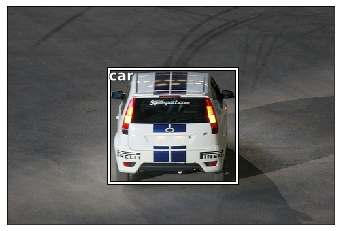

In [41]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [42]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [43]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [44]:
trn_fns[12]

'000012.jpg'

In [45]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(str(IMG_PATH/trn_fns[i]))
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


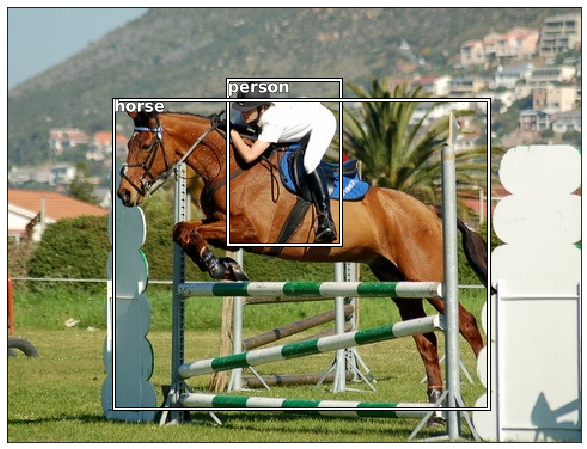

In [46]:
draw_idx(17)

# Largest Item Classifier

In [47]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [48]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

In [49]:
trn_anno

defaultdict(<function __main__.<lambda>()>,
            {12: [(array([ 96, 155, 269, 350]), 7)],
             17: [(array([ 61, 184, 198, 278]), 15),
              (array([ 77,  89, 335, 402]), 13)],
             23: [(array([229,   8, 499, 244]), 2),
              (array([219, 229, 499, 333]), 2),
              (array([  0,   1, 368, 116]), 15),
              (array([  1,   2, 461, 242]), 15),
              (array([  0, 224, 485, 333]), 15)],
             26: [(array([124,  89, 211, 336]), 7)],
             32: [(array([ 77, 103, 182, 374]), 1),
              (array([ 87, 132, 122, 196]), 1),
              (array([179, 194, 228, 212]), 15),
              (array([188,  25, 237,  43]), 15)],
             33: [(array([106,   8, 262, 498]), 1),
              (array([199, 420, 225, 481]), 1),
              (array([187, 324, 222, 410]), 1)],
             34: [(array([166, 115, 399, 359]), 19),
              (array([152, 140, 228, 332]), 19)],
             35: [(array([ 95,   0, 360, 190]), 

In [50]:
trn_lrg_anno

{12: (array([ 96, 155, 269, 350]), 7),
 17: (array([ 77,  89, 335, 402]), 13),
 23: (array([  1,   2, 461, 242]), 15),
 26: (array([124,  89, 211, 336]), 7),
 32: (array([ 77, 103, 182, 374]), 1),
 33: (array([106,   8, 262, 498]), 1),
 34: (array([166, 115, 399, 359]), 19),
 35: (array([ 97, 217, 317, 464]), 15),
 36: (array([ 78,  26, 343, 318]), 12),
 42: (array([ 31, 262, 294, 499]), 19),
 44: (array([  0,   0, 329, 369]), 9),
 47: (array([  0,  14, 311, 458]), 7),
 48: (array([  0,   1, 499, 301]), 15),
 61: (array([ 10, 273, 278, 436]), 4),
 64: (array([ 22,   0, 499, 450]), 3),
 66: (array([181, 241, 258, 273]), 15),
 73: (array([142, 120, 459, 374]), 16),
 77: (array([  0,   1, 332, 305]), 8),
 78: (array([ 74,  14, 411, 474]), 12),
 83: (array([ 32, 108, 308, 446]), 7),
 89: (array([ 50,  21, 290, 316]), 9),
 91: (array([240, 124, 283, 194]), 7),
 104: (array([  6,   1, 332, 282]), 15),
 112: (array([173,  69, 327, 276]), 12),
 122: (array([ 19,  35, 473, 429]), 8),
 129: (arr

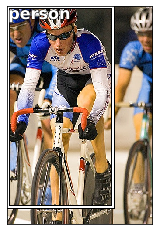

In [51]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(str(IMG_PATH/trn_fns[23])))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [52]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [53]:
trn_fns

{12: '000012.jpg',
 17: '000017.jpg',
 23: '000023.jpg',
 26: '000026.jpg',
 32: '000032.jpg',
 33: '000033.jpg',
 34: '000034.jpg',
 35: '000035.jpg',
 36: '000036.jpg',
 42: '000042.jpg',
 44: '000044.jpg',
 47: '000047.jpg',
 48: '000048.jpg',
 61: '000061.jpg',
 64: '000064.jpg',
 66: '000066.jpg',
 73: '000073.jpg',
 77: '000077.jpg',
 78: '000078.jpg',
 83: '000083.jpg',
 89: '000089.jpg',
 91: '000091.jpg',
 104: '000104.jpg',
 112: '000112.jpg',
 122: '000122.jpg',
 129: '000129.jpg',
 133: '000133.jpg',
 134: '000134.jpg',
 138: '000138.jpg',
 140: '000140.jpg',
 141: '000141.jpg',
 147: '000147.jpg',
 153: '000153.jpg',
 154: '000154.jpg',
 159: '000159.jpg',
 161: '000161.jpg',
 162: '000162.jpg',
 163: '000163.jpg',
 164: '000164.jpg',
 171: '000171.jpg',
 173: '000173.jpg',
 174: '000174.jpg',
 187: '000187.jpg',
 189: '000189.jpg',
 192: '000192.jpg',
 193: '000193.jpg',
 194: '000194.jpg',
 198: '000198.jpg',
 200: '000200.jpg',
 207: '000207.jpg',
 209: '000209.jpg',
 2

In [54]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)
df.head()

fn        cat
0  000012.jpg        car
1  000017.jpg      horse
2  000023.jpg     person
3  000026.jpg        car
4  000032.jpg  aeroplane

In [55]:
f_model = resnet34
sz=224
bs=64

In [56]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)
md.val_dl

In [57]:
x,y=next(iter(md.val_dl))
x


( 0 , 0 ,.,.) = 
  3.9125e-01  4.3014e-01  4.8172e-01  ...   1.7518e-01  3.2367e-01  4.0783e-01
  5.1636e-01  4.4973e-01  5.9202e-01  ...   1.7386e-01  2.3164e-01  3.6722e-01
  5.4416e-01  5.7267e-01  7.0099e-01  ...   5.7682e-02  2.2320e-01  3.5455e-01
                 ...                   ⋱                   ...                
  1.4604e+00  1.5029e+00  1.5195e+00  ...   7.8030e-01  5.6716e-01 -6.3922e-01
  9.3739e-01  1.0210e+00  1.1599e+00  ...   1.1281e+00  1.0895e+00  4.5857e-01
  5.8584e-01  4.5245e-01  2.9605e-01  ...   1.0003e+00  9.2495e-01  8.2729e-01

( 0 , 1 ,.,.) = 
  2.4041e-01  3.1444e-01  4.1422e-01  ...   3.3162e-01  4.7052e-01  5.4764e-01
  3.9737e-01  4.2156e-01  5.7304e-01  ...   3.3887e-01  3.8799e-01  5.2038e-01
  5.2462e-01  5.8245e-01  6.7485e-01  ...   2.5190e-01  4.0003e-01  5.1502e-01
                 ...                   ⋱                   ...                
  1.4721e+00  1.5019e+00  1.5077e+00  ...   6.0917e-01  4.4337e-01 -7.3978e-01
  8.4169e-01  9.

In [58]:
y


 14
 17
  2
 14
 14
  5
 13
 10
  2
  9
 15
  6
  8
  7
 12
  0
 14
 14
  7
 19
  1
 14
 14
 13
 14
 14
 14
  5
  9
 18
 13
  0
  2
  6
 18
 11
 14
  3
  0
 10
  6
 13
 12
 14
  3
 13
 14
  7
 12
 13
  9
 14
  1
  2
 14
 11
  6
  0
  2
  2
  2
 17
 14
  9
[torch.cuda.LongTensor of size 64 (GPU 0)]

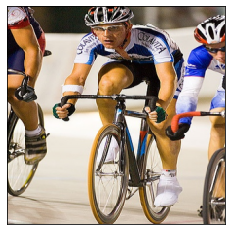

In [59]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [60]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

In [61]:
lrf=learn.lr_find(1e-5,100)

 78%|███████▊  | 25/32 [00:11<00:01,  3.84it/s, loss=5.4] 

The first few points and the last few points have been removed and hence the graph is only one slope line. They've been removed because the last few points shoots so high up to infinity that we can't see anything. So, many times its a good idea to remove the last few points. But if we have few mini batches, its not a good idea.

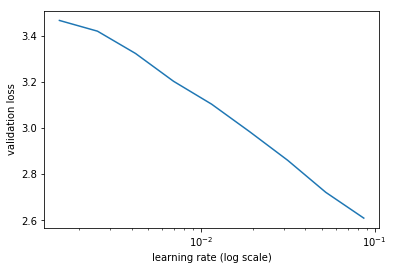

In [62]:
learn.sched.plot()

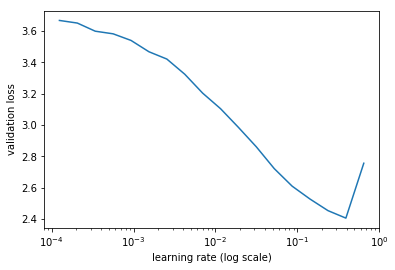

In [63]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [64]:
lr = 2e-2

In [65]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                 
    0      1.280746   0.578553   0.814     


[array([0.57855]), 0.8140000023841858]

In [66]:
lrs = np.array([lr/1000,lr/100,lr])

In [67]:
learn.freeze_to(-2)

 84%|████████▍ | 27/32 [00:16<00:02,  1.87it/s, loss=2.37] 

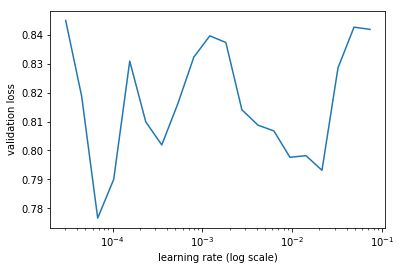

In [68]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [69]:
learn.fit(lrs/5, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.761405   0.576717   0.822     


[array([0.57672]), 0.8220000009536743]

In [70]:
learn.unfreeze()

In [71]:
learn.fit(lrs/5, 1, cycle_len=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.62084    0.538905   0.834     
    1      0.47124    0.527162   0.828                     


[array([0.52716]), 0.8279999976158142]

In [72]:
learn.save('clas_one')

In [73]:
learn.load('clas_one')

In [74]:
x,y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x,preds = to_np(x),to_np(probs)
preds = np.argmax(preds, -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


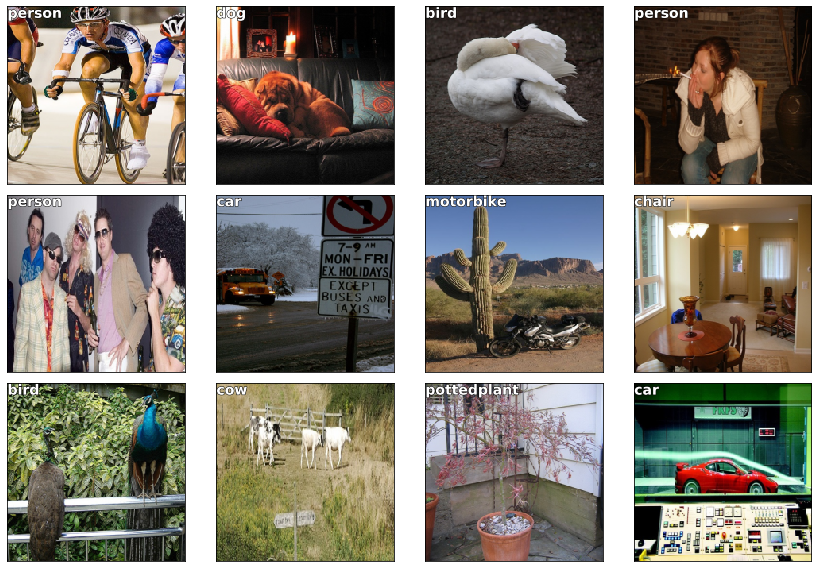

In [75]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

# BBox Only

Now we'll try to find the bounding box of the largest object. This is simply a regression with 4 outputs. So we can use a CSV with multiple 'labels'.

In [76]:
BB_CSV = PATH/'tmp/bb.csv'

In [77]:
BB_CSV

PosixPath('../data/pascal/tmp/bb.csv')

In [78]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [79]:
df.head()

fn            bbox
0  000012.jpg  96 155 269 350
1  000017.jpg   77 89 335 402
2  000023.jpg     1 2 461 242
3  000026.jpg  124 89 211 336
4  000032.jpg  77 103 182 374

In [80]:
f_model=resnet34
sz=224
bs=64

RandomLighting - for contrast

RandomRotate - for rotating

RandomFlip - every possible 90 degree rotation

In [81]:
augs = [RandomFlip(), 
        RandomRotate(30),
        RandomLighting(0.1,0.1)]

Set continuous=True to tell fastai this is a regression problem, which means it won't one-hot encode the labels, and will use MSE as the default crit.

Note that we have to tell the transforms constructor that our labels are coordinates, so that it can handle the transforms correctly.

Also, we use CropType.NO because we want to 'squish' the rectangular images into squares, rather than center cropping, so that we don't accidentally crop out some of the objects. (This is less of an issue in something like imagenet, where there is a single object to classify, and it's generally large and centrally located).

In [82]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]


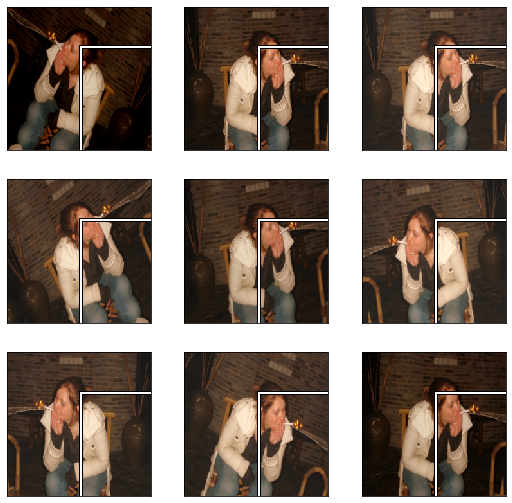

In [83]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

As we can see above, the bounding box is not moving and is in the wrong spot. This is the problem is with data augmentation when dependent variable is pixel value.

To overcome that problem, we pass tfm_y parameter to the RandomFlip/Rotate/Lighting methods.

.COORD option says that y values are coordinates

In [84]:
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1,0.1, tfm_y=TfmType.COORD)]

In [85]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[ 55.  23. 133. 200.]
[ 66.  38. 105. 183.]
[ 47.  25. 136. 198.]
[ 35.  18. 154. 205.]
[ 52.  38. 106. 183.]
[ 66.  38. 105. 183.]
[ 46.  31. 116. 192.]
[ 35.  19. 154. 204.]
[ 46.  11. 155. 212.]


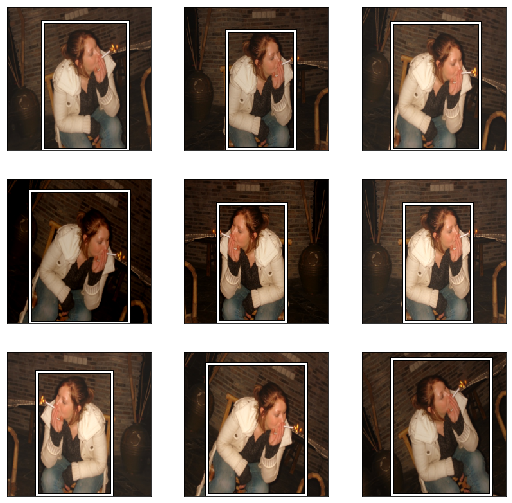

In [86]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [87]:
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=tfm_y, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, bs=bs, continuous=True)

In [88]:
512*7*7

25088

In [89]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

.summary() runs a small batch of data through a model and prints out how big it is at every layer. At the end of convolution section before we hit the flatten section, it is 512*7*7. Hence we use that number for the Linear Layer above

In [90]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

 78%|███████▊  | 25/32 [00:11<00:02,  2.34it/s, loss=386] 

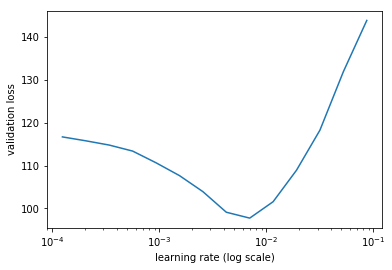

In [91]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [92]:
lr = 2e-3

In [93]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                            
    0      49.50128   35.219429 
    1      37.111195  28.640799                           
    2      31.715551  27.64999                            


[array([27.64999])]

In [94]:
lrs = np.array([lr/100,lr/10,lr])

In [95]:
learn.freeze_to(-2)

epoch      trn_loss   val_loss                            
    0      80.274639  9.079029902707e+16


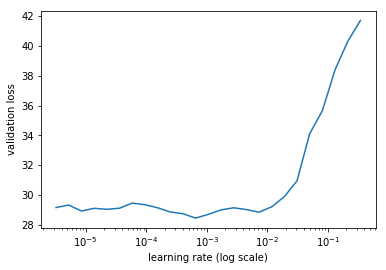

In [96]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [97]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                            
    0      26.305922  22.73961  
    1      23.466191  22.526714                           
    2      20.079906  20.003998                           


[array([20.004])]

In [98]:
learn.freeze_to(-3)

In [99]:
learn.fit(lrs, 1, cycle_len=2)

epoch      trn_loss   val_loss                            
    0      18.511008  21.043718 
    1      16.366461  19.550411                           


[array([19.55041])]

In [100]:
learn.save('reg4')

In [101]:
learn.load('reg4')

In [102]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


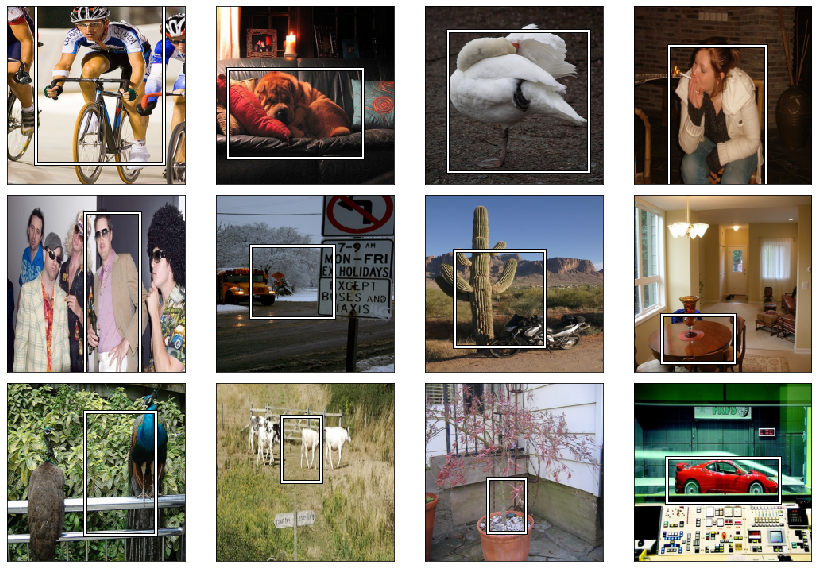

In [103]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()